In [390]:
'''
DESCRIPTION

Problem Statement
* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments 
for the most chronic, costly, and consequential diseases.
* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, 
based on certain diagnostic measurements included in the dataset.
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.
'''

'\nDESCRIPTION\n\nProblem Statement\n* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments \nfor the most chronic, costly, and consequential diseases.\n* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, \nbased on certain diagnostic measurements included in the dataset.\n* Build a model to accurately predict whether the patients in the dataset have diabetes or not.\n'

In [391]:
#Importing required libraries and dataset
import pandas as pd
diabetes_df = pd.read_csv("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science\Data Science Capstone/Data-Science-Capstone-Projects-master/Project 2/Healthcare - Diabetes/health care diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [392]:
'''
Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, 
a value of zero does not make sense and thus indicates missing value:

• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the 
data types and the count of variables. 
'''

'\nData Exploration:\n\n1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, \na value of zero does not make sense and thus indicates missing value:\n\n• Glucose\n• BloodPressure\n• SkinThickness\n• Insulin\n• BMI\n\n2. Visually explore these variables using histograms. Treat the missing values accordingly.\n\n3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the \ndata types and the count of variables. \n'

In [393]:
#Data Preprocessing
#Exploring the dataset
diabetes_df.info()
#768 rows x 9 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [394]:
#Checking for NULL values
diabetes_df.isna().sum()
# Observations:
# No NULL values are present in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [395]:
#Checking for duplicates
diabetes_df[diabetes_df.duplicated()]
# Observations:
# No duplicate records are present in the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [396]:
#Statistical Overview
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [397]:
'''
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, 
a value of zero does not make sense and thus indicates missing value:

• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI
'''
#Checking for zero values in above specified columns
(diabetes_df==0).sum()
# Observations:
# Zero values in the above mentioned columns are similar to NULL values whereas zeros in other columns make sense

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

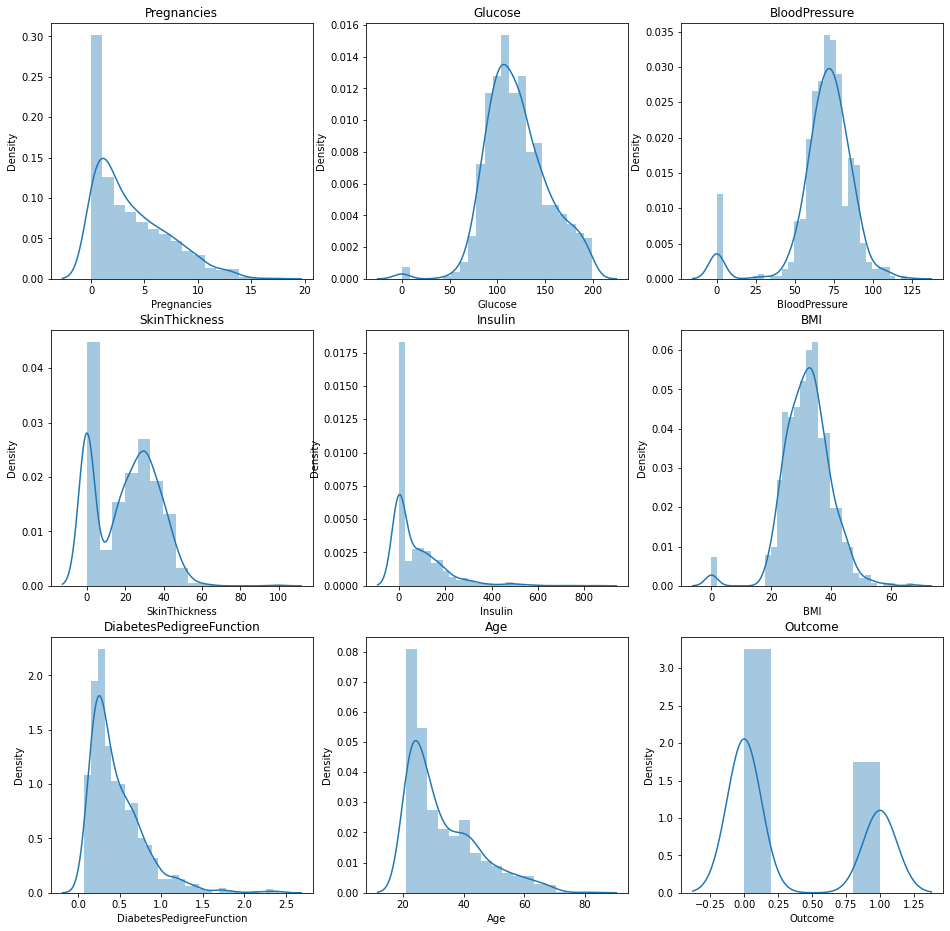

In [398]:
# 2. Visually explore these variables using histograms. Treat the missing values accordingly.
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Histograms
fig = plt.figure(figsize=(16,16))
for i in range(len(diabetes_df.columns)):
    plt.subplot(3,3,i+1)
    sns.distplot(diabetes_df.iloc[:,i],kde=True)
    plt.title(diabetes_df.columns[i])
plt.show()

# Observations:
# 1. Pregnancies, Insulin, Diabetes pedigree function and Age have right-skewed distributions
# 2. Glucose, Blood Pressure, Skin Thickness and BMI are approximately normally distributed (ignoring zero values)
# 3. We can either remove missing values or impute the missing values with any measure of central tendency (mean , median or mode)
# depending on the datatype
# 4. Since we have a small dataset, It doesn't make sense to remove rows with zero values
# 5. Also, We can impute with either mean or median as we have numerical columns

In [399]:
#Splitting the dataset into train and test sets before imputing to prevent data leakage
#Splitting the data into x and y variables
x = diabetes_df.drop(['Outcome'],axis=1)
y = diabetes_df['Outcome']

print(diabetes_df.shape)
print(x.shape)
print(y.shape)

#Splitting into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 9)
(768, 8)
(768,)
(576, 8)
(192, 8)
(576,)
(192,)


In [400]:
#Imputing missing values with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0,strategy='median')
x_train2 = imputer.fit_transform(x_train.iloc[:,1:6])
x_test2 = imputer.transform(x_test.iloc[:,1:6])

In [401]:
#Converting arrays into data frames
x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)

print(x_train2)
print(x_test2)

         0      1     2      3     4
0    171.0   72.0  29.0  122.0  43.6
1    108.0   44.0  20.0  130.0  24.0
2    196.0   90.0  29.0  122.0  39.8
3    134.0   70.0  29.0  122.0  28.9
4    117.0   96.0  29.0  122.0  28.7
..     ...    ...   ...    ...   ...
571  133.0  102.0  28.0  140.0  32.8
572  129.0   60.0  12.0  231.0  27.5
573  116.0   74.0  15.0  105.0  26.3
574   88.0   30.0  42.0   99.0  55.0
575   96.0   74.0  18.0   67.0  33.6

[576 rows x 5 columns]
         0     1     2      3     4
0    154.0  72.0  29.0  126.0  31.3
1    112.0  86.0  42.0  160.0  38.4
2    135.0  54.0  29.0  122.0  26.7
3    107.0  62.0  13.0   48.0  22.9
4    102.0  74.0  29.0  122.0  29.5
..     ...   ...   ...    ...   ...
187  105.0  80.0  28.0  122.0  32.5
188   87.0  68.0  34.0   77.0  37.6
189  103.0  66.0  29.0  122.0  24.3
190  143.0  74.0  22.0   61.0  26.2
191  173.0  78.0  32.0  265.0  46.5

[192 rows x 5 columns]


In [402]:
#Replacing with imputed values in the original data
for i in range(5):
    x_train.iloc[:,i+1] = x_train2.iloc[:,i].values
    x_test.iloc[:,i+1] = x_test2.iloc[:,i].values

print(x_train)
print(x_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
235            4    171.0           72.0           29.0    122.0  43.6   
576            6    108.0           44.0           20.0    130.0  24.0   
22             7    196.0           90.0           29.0    122.0  39.8   
451            2    134.0           70.0           29.0    122.0  28.9   
616            6    117.0           96.0           29.0    122.0  28.7   
..           ...      ...            ...            ...      ...   ...   
369            1    133.0          102.0           28.0    140.0  32.8   
320            4    129.0           60.0           12.0    231.0  27.5   
527            3    116.0           74.0           15.0    105.0  26.3   
125            1     88.0           30.0           42.0     99.0  55.0   
265            5     96.0           74.0           18.0     67.0  33.6   

     DiabetesPedigreeFunction  Age  
235                     0.479   26  
576                     0.813   35  


In [403]:
#Checking for NULL values
print(x_train.isna().sum())
print(x_test.isna().sum())
# Observation:
# The original dataset has zero NULL values after imputing

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


float64    6
int64      2
dtype: int64


Text(0.5, 1.0, 'Frequency of Datatypes')

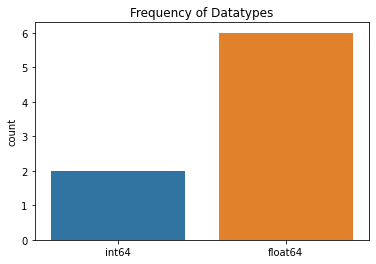

In [404]:
# There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types 
# and the count of variables.
print(x_train.dtypes.value_counts())
sns.countplot(x_train.dtypes.map(str))
plt.title("Frequency of Datatypes")

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

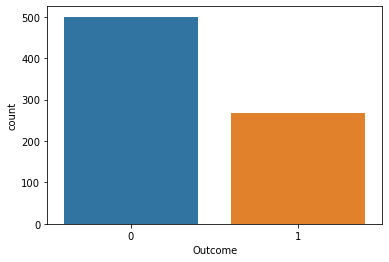

In [405]:
# Check the balance of the data by plotting the count of outcomes by their value. 
# Describe your findings and plan future course of action.
print(diabetes_df['Outcome'].value_counts())
sns.countplot(diabetes_df['Outcome'])
# Observations:
# We can clearly see that we have an unbalanced dataset which might bias the predictions towards the 'No diabetes' Category
# We can use techniques like undersampling the majority, oversampling the minority classes or change class weights according 
# to the category
#Since, we have decent amount (~35%) of 'Diabetes' category, We can proceed to model building

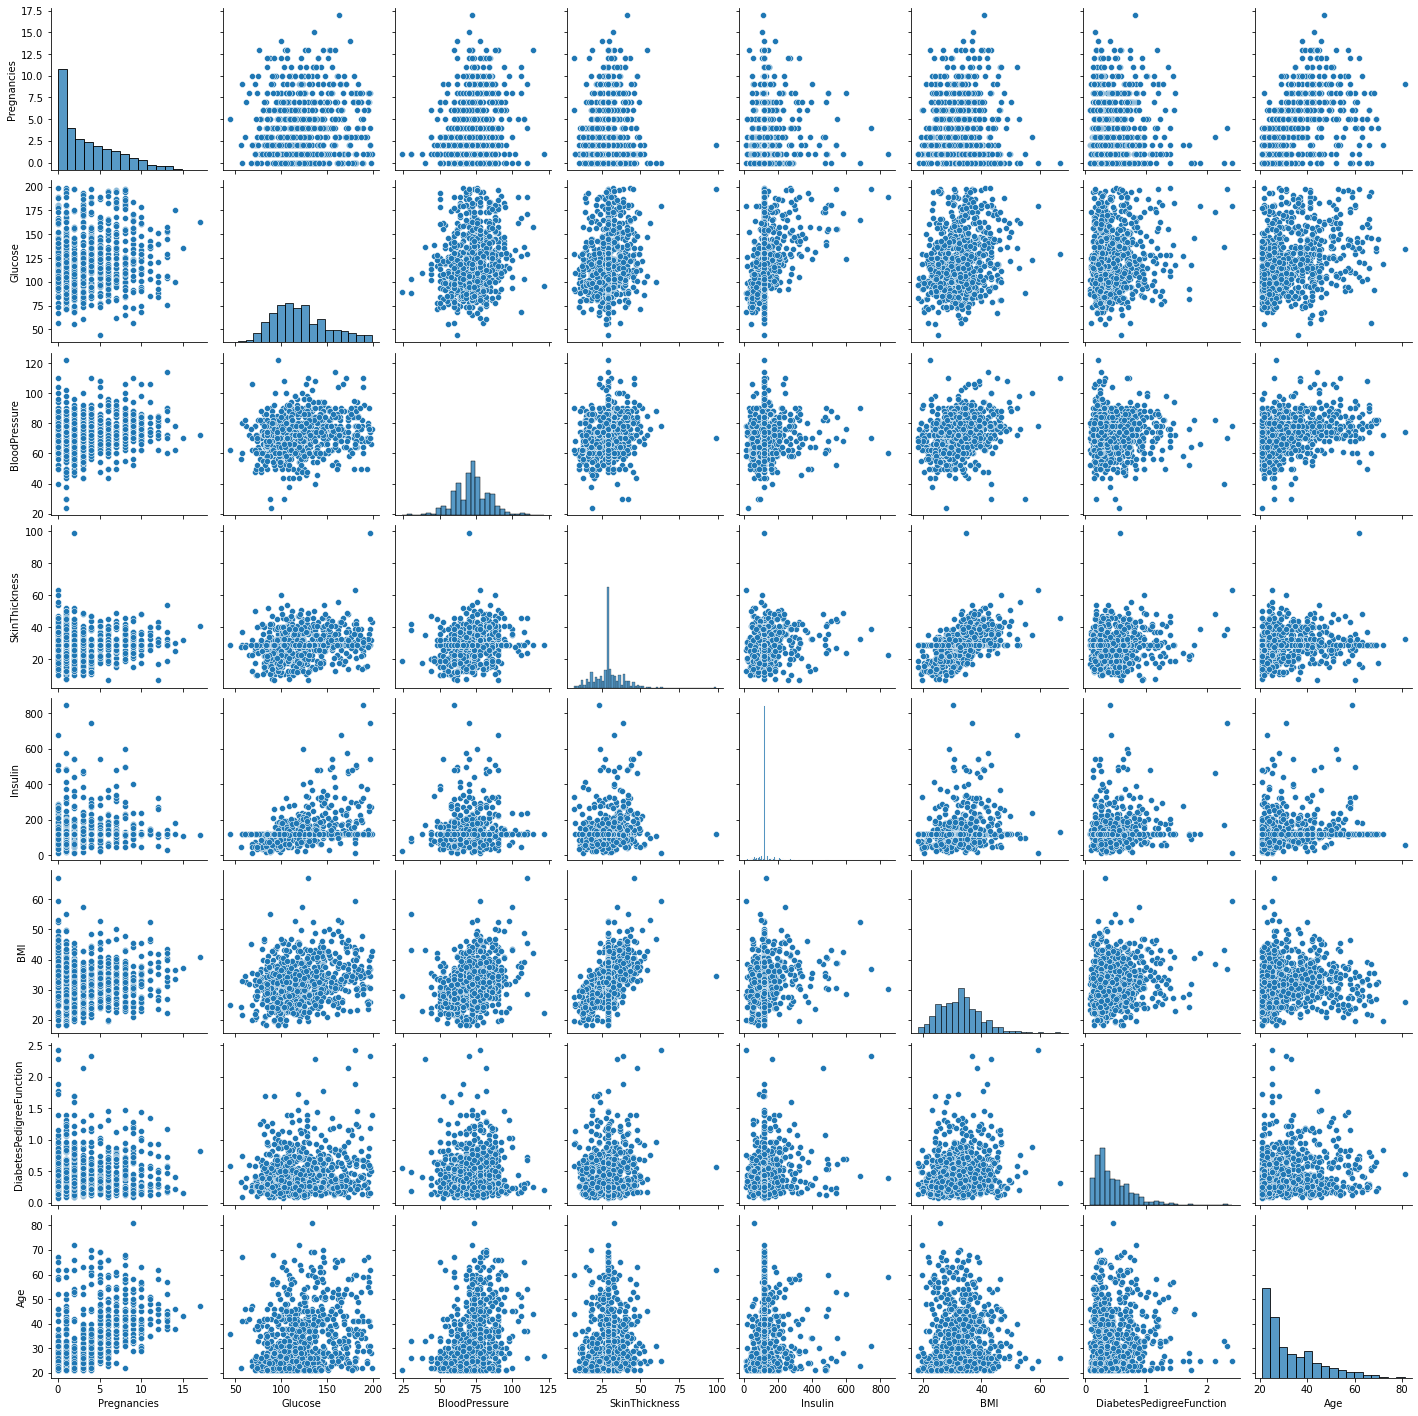

In [406]:
# Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
sns.pairplot(x_train.append(x_test))
# Observations:
# Number of Pregnancies is positively correlated with Age and no clear relationship can be seen with any other variable
# Glucose is positively coreelated with Insulin levels, BMI and Age
# Blood Pressure is slightly positively correlated with BMI and Age
# Skin Thickness is positively correlated with BMI

<AxesSubplot:>

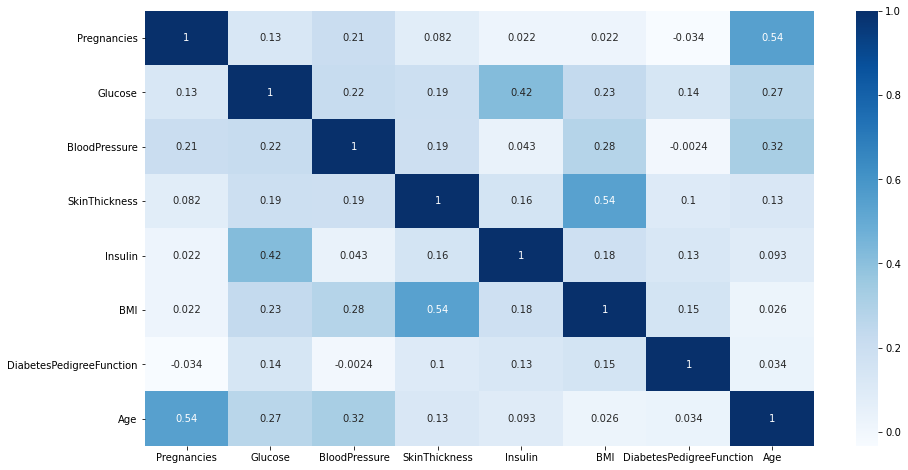

In [407]:
#Perform correlation analysis. Visually explore it using a heat map.
plt.figure(figsize=(15,8))
sns.heatmap(x_train.append(x_test).corr(),annot=True,cmap='Blues')
# Observations:
# We can use correlation heatmap to provide affirmation to the relationships found using scatterplots

In [408]:
# Data Modeling:

#1. Devise strategies for model building. It is important to decide the right validation framework. 
# Express your thought process.

# Observations:
# As the objective is to predict whether a person has diabetes or not, we will choose classification techniques
# Since it is a binary classification problem, we can start with logistic regression and proceed with Naive bayes, KNN, SVM, 
# decision trees and random forest
# We can validate the model using performance metrics like accuracy, precision, recall and f1-score

In [409]:
#2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
# Classification Model 1 ---Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initiating the model
lr = LogisticRegression()

#Training the data
diabetes_logreg_model = lr.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_logreg_model.predict(x_test)
y_score = diabetes_logreg_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.54570864 0.18602329 0.56242091 0.10742602 0.08027523 0.04482417
 0.0834603  0.29423032 0.04409881 0.29290412 0.06147831 0.19366369
 0.91955662 0.27378981 0.09495772 0.66833483 0.76979316 0.04407987
 0.07405271 0.97583381 0.3236701  0.47340994 0.34970138 0.24921917
 0.13159764 0.68082063 0.26052793 0.38209257 0.46198958 0.84192141
 0.26835354 0.03587535 0.06455571 0.16371296 0.44188361 0.1061591
 0.38165122 0.22239545 0.75208911 0.04284856 0.3774296  0.29150902
 0.40725902 0.38320321 0.54170171 0.08362314 0.46954966 0.09775233
 0.48284205 0.32473

Accuracy:  0.734375

 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       121
           1       0.70      0.49      0.58        71

    accuracy                           0.73       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192

Sensitivity: 
 0.49295774647887325

 Specificity: 
 0.8760330578512396

 AUC Score: 
 0.8181818181818183

 Confusion Matrix: 
 [[106  15]
 [ 36  35]]


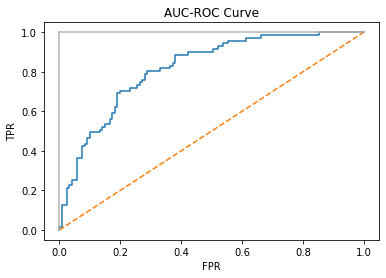

In [410]:
#Model Evaluation
from sklearn import metrics
def evaluate(y_test,y_pred,y_score):
    fpr, tpr, th = metrics.roc_curve(y_test,y_score)
    
    #Computing Metric Values
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
    print("\n Classification Report: \n",metrics.classification_report(y_test,y_pred))
    print("Sensitivity: \n",cm[1,1]/(cm[1,1]+cm[1,0]))
    print("\n Specificity: \n",cm[0,0]/(cm[0,0]+cm[0,1]))
    print("\n AUC Score: \n",metrics.roc_auc_score(y_test,y_score))
    print("\n Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred))
    
    #Plotting AUC-ROC Curve
    plt.plot(fpr,tpr)
    plt.plot([0,1],ls="--")
    plt.plot([0,0],[1,0],c='0.7'),plt.plot([1,1],c='0.7')
    plt.title("AUC-ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

evaluate(y_test,y_pred,y_score)

In [411]:
#Creating Variables to store metrics
acc = []
prec = []
rec = []
f1 = []
auc = []
sen = []
spec = []

In [412]:
#Passing metric values into list
def results(y_test,y_pred,y_score):
    acc.append(metrics.accuracy_score(y_test,y_pred))
    prec.append(metrics.precision_score(y_test,y_pred))
    rec.append(metrics.recall_score(y_test,y_pred))
    f1.append(metrics.f1_score(y_test,y_pred))
    auc.append(metrics.roc_auc_score(y_test,y_score))
    cm = metrics.confusion_matrix(y_test,y_pred)
    spec.append(cm[0,0]/(cm[0,0]+cm[0,1]))
    sen.append(cm[1,1]/(cm[1,1]+cm[1,0]))

results(y_test,y_pred,y_score)

In [413]:
# Classification Model 2 ---Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initiating the model
nb = GaussianNB()

#Training the data
diabetes_nb_model = nb.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_nb_model.predict(x_test)
y_score = diabetes_nb_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.38358245 0.24167194 0.25814408 0.00579071 0.03112576 0.00363374
 0.00922275 0.15717169 0.01845631 0.35089651 0.00591287 0.22304191
 0.9982309  0.34846645 0.02411314 0.92666107 0.96163962 0.04657914
 0.10992066 0.9993804  0.13684936 0.58475875 0.55551833 0.48421721
 0.33012784 0.88048094 0.44360731 0.31134409 0.32181527 0.89339423
 0.03905201 0.0069864  0.00880741 0.0602197  0.59306965 0.01944284
 0.17861264 0.08964734 0.96014809 0.00589882 0.29884142 0.03419019
 0.57138847 0.36900901 0.80656367 0.11562879 0.59519033 0.02094675
 0.19233178 0.0955

Accuracy:  0.7291666666666666

 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       121
           1       0.67      0.52      0.59        71

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.72      0.73      0.72       192

Sensitivity: 
 0.5211267605633803

 Specificity: 
 0.8512396694214877

 AUC Score: 
 0.7851239669421487

 Confusion Matrix: 
 [[103  18]
 [ 34  37]]


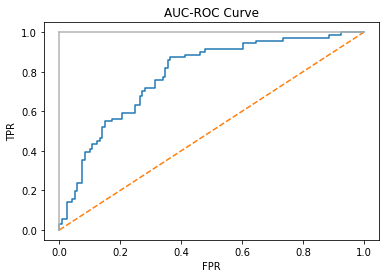

In [414]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [415]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [416]:
# Classification Model 3 ---KNN
from sklearn.neighbors import KNeighborsClassifier

#Initiating the model
knn = KNeighborsClassifier(n_neighbors=5)

#Training the data
diabetes_knn_model = knn.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_knn_model.predict(x_test)
y_score = diabetes_knn_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.4 0.4 0.8 0.  0.6 0.  0.  0.8 0.  0.4 0.  0.  0.8 0.2 0.2 1.  0.6 0.
 0.  1.  0.6 0.4 0.4 0.  0.  0.4 0.  0.4 0.8 1.  0.4 0.  0.  0.  0.4 0.4
 0.4 0.4 0.6 0.  0.6 0.2 0.4 0.2 0.6 0.  0.6 0.4 0.8 0.6 0.2 0.8 0.2 0.4
 0.4 0.  0.  0.4 0.6 0.  0.2 0.2 0.  0.2 0.  0.6 0.4 0.2 0.  0.4 0.8 0.2
 0.  0.6 0.2 0.  0.8 1.  0.4 0.2 0.  1.  0.  0.  1.  0.6 0.8 0.4 0.4 0.4
 0.4 0.2 0.  0.  0.4 0.  0.8 0.  0.2 0.8 0.2 0.4 0.4 0.6 0.2 0.2 1.  0.
 0.6 0.4 0.  0.8 0.2 0.  0.6 0.  0.  0.6 0.  0.4 0.2 0.  0.  0.4 0.4 0.8
 0.2 0.  0.8 0.  0.6 0.6 0.2 0.  0.  0.  0.8 

Text(0, 0.5, 'Error rate')

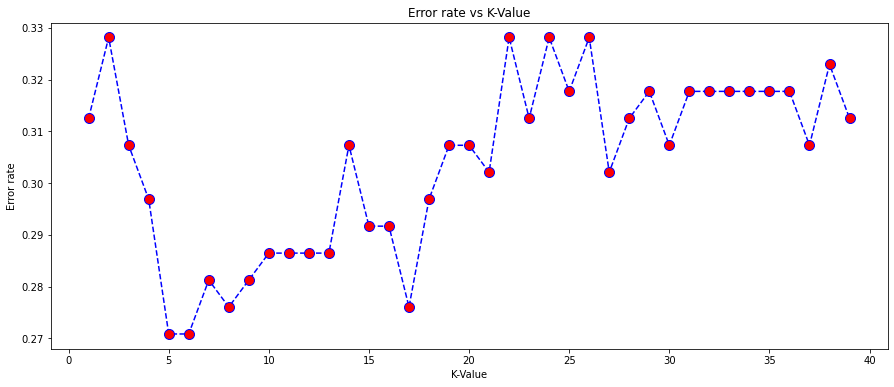

In [417]:
#Finding optimal number for 'K' (Number of Neighbors)
import numpy as np
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

#Visualizing error rate
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error rate")
# Observations:
# Error rate is minimal for k=5,6 => Optimal K-Value=5 or 6

Accuracy:  0.7291666666666666

 Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       121
           1       0.67      0.54      0.59        71

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.72       192

Sensitivity: 
 0.5352112676056338

 Specificity: 
 0.8429752066115702

 AUC Score: 
 0.7604469793970434

 Confusion Matrix: 
 [[102  19]
 [ 33  38]]


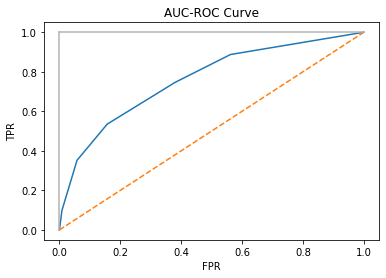

In [418]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [419]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [420]:
# Classification Model 4 ---SVM
from sklearn.svm import SVC

#Initiating the model
svc = SVC(probability=True)

#Training the data
diabetes_svc_model = svc.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_svc_model.predict(x_test)
y_score = diabetes_svc_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.64773692 0.24837852 0.47293221 0.11723825 0.143487   0.0856918
 0.1230792  0.25239868 0.08645449 0.5        0.09096335 0.28107278
 0.8606862  0.20664901 0.12288065 0.77088639 0.90331082 0.09936851
 0.11346125 0.86932196 0.24370468 0.31638004 0.19920493 0.08480476
 0.09853526 0.72538172 0.14373208 0.3094995  0.5196593  0.90648346
 0.27926711 0.06618877 0.14313153 0.1203312  0.36212492 0.22605962
 0.26751948 0.20459183 0.7235242  0.08817088 0.35307431 0.36586434
 0.33920927 0.24732906 0.44955837 0.10279763 0.42047562 0.22915438
 0.40360468 0.25534

Accuracy:  0.703125

 Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.89      0.79       121
           1       0.68      0.38      0.49        71

    accuracy                           0.70       192
   macro avg       0.69      0.64      0.64       192
weighted avg       0.70      0.70      0.68       192

Sensitivity: 
 0.38028169014084506

 Specificity: 
 0.8925619834710744

 AUC Score: 
 0.7649866138982656

 Confusion Matrix: 
 [[108  13]
 [ 44  27]]


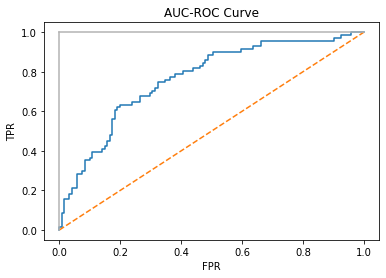

In [421]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [422]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [423]:
# Classification Model 5 ---Decision Trees
from sklearn.tree import DecisionTreeClassifier

#Initiating the model
dt = DecisionTreeClassifier()

#Training the data
diabetes_dt_model = dt.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_dt_model.predict(x_test)
y_score = diabetes_dt_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0
 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 1]
Predicted Probabilities for diabetes: 
 [1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 

Accuracy:  0.7291666666666666

 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       121
           1       0.63      0.63      0.63        71

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

Sensitivity: 
 0.6338028169014085

 Specificity: 
 0.7851239669421488

 AUC Score: 
 0.7094633919217787

 Confusion Matrix: 
 [[95 26]
 [26 45]]


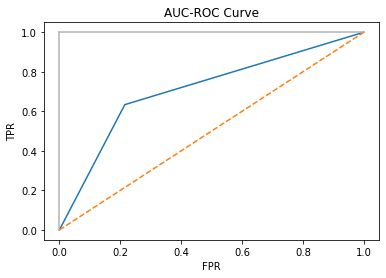

In [424]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [425]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [426]:
# Classification Model 6 ---Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initiating the model
rfc = RandomForestClassifier()

#Training the data
diabetes_rfc_model = rfc.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_rfc_model.predict(x_test)
y_score = diabetes_rfc_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.59 0.25 0.44 0.01 0.26 0.   0.01 0.56 0.09 0.42 0.04 0.33 0.95 0.21
 0.1  0.7  0.63 0.09 0.11 0.78 0.53 0.35 0.33 0.39 0.21 0.52 0.16 0.37
 0.54 0.85 0.1  0.06 0.03 0.17 0.42 0.11 0.26 0.24 0.82 0.02 0.47 0.07
 0.44 0.22 0.63 0.26 0.37 0.11 0.44 0.46 0.05 0.93 0.32 0.51 0.5  0.17
 0.07 0.13 0.37 0.01 0.12 0.06 0.03 0.18 0.11 0.63 0.75 0.42 0.2  0.66
 0.82 0.51 0.26 0.49 0.18 0.28 0.76 0.7  0.   0.12 0.   0.77 0.03 0.35
 0.36 0.72 0.49 0.36 0.72 0.14 0.24 0.37 0.   0.17 0.08 0.08 0.79 0.06
 0.18 0.23 0.42 0.22 0.59 0.56 0.1  0.43 0.8  0.83 0.5  0

Accuracy:  0.7604166666666666

 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       121
           1       0.74      0.55      0.63        71

    accuracy                           0.76       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192

Sensitivity: 
 0.5492957746478874

 Specificity: 
 0.8842975206611571

 AUC Score: 
 0.8200442323361657

 Confusion Matrix: 
 [[107  14]
 [ 32  39]]


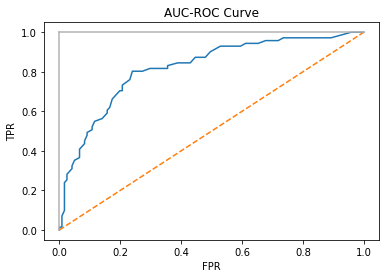

In [427]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [428]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [429]:
# Classification Model 7 ---XGBoost (Extreme Gradient Boost)
from xgboost import XGBClassifier

#Initiating the model
xgb = XGBClassifier(max_depth=5,n_estimators=100,learning_rate=0.05)
#xgb = XGBRFClassifier(max_depth=10,n_estimators=100,learning_rate=0.05)

#Training the data
diabetes_xgb_model = xgb.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_xgb_model.predict(x_test)
y_score = diabetes_xgb_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.72407854 0.29476905 0.5800569  0.00980023 0.15538847 0.00858412
 0.05162851 0.5542416  0.05733493 0.41707045 0.01202211 0.13382986
 0.93788725 0.11831927 0.06448663 0.7565831  0.88275707 0.02881015
 0.04577414 0.79510134 0.48697668 0.39593467 0.25513202 0.18546177
 0.0440326  0.63608134 0.04306978 0.34740248 0.4086774  0.9226656
 0.10276293 0.03444543 0.01399162 0.12522642 0.13994414 0.1225279
 0.17310512 0.13392022 0.91641027 0.03234716 0.48695424 0.0518192
 0.52191114 0.18700972 0.5999961  0.13323708 0.58334064 0.03551537
 0.5799211  0.4788673

Accuracy:  0.7604166666666666

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       121
           1       0.72      0.58      0.64        71

    accuracy                           0.76       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192

Sensitivity: 
 0.5774647887323944

 Specificity: 
 0.8677685950413223

 AUC Score: 
 0.8086369456407869

 Confusion Matrix: 
 [[105  16]
 [ 30  41]]


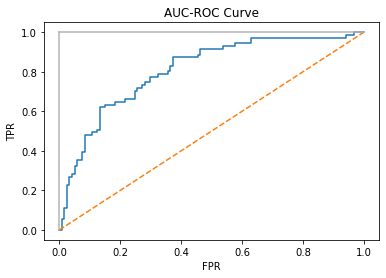

In [430]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [431]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [432]:
# Classification Model 8 ---XGBoost with Random Forest (Extreme Gradient Boost with Random Forest)
from xgboost import XGBRFClassifier

#Initiating the model
xgbrf = XGBRFClassifier(max_depth=10,n_estimators=100,learning_rate=0.05)

#Training the data
diabetes_xgbrf_model = xgbrf.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_xgbrf_model.predict(x_test)
y_score = diabetes_xgbrf_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.50765467 0.4825804  0.5011224  0.47536993 0.49225974 0.4750208
 0.47512057 0.50586504 0.47883058 0.49540338 0.4756756  0.4827393
 0.51862824 0.48508456 0.47760314 0.51271266 0.51637626 0.47984907
 0.48195103 0.5169981  0.5003002  0.4940526  0.48439202 0.48757285
 0.47539493 0.50342435 0.48376763 0.498778   0.5021733  0.5196018
 0.4821005  0.47615665 0.47543642 0.48183662 0.49105248 0.48510286
 0.481892   0.48401436 0.5187162  0.4750208  0.506485   0.4814225
 0.49410504 0.47706735 0.50824165 0.4827569  0.49614358 0.48200306
 0.50280714 0.5037372 

Accuracy:  0.765625

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       121
           1       0.72      0.59      0.65        71

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.76      0.77      0.76       192

Sensitivity: 
 0.5915492957746479

 Specificity: 
 0.8677685950413223

 AUC Score: 
 0.826213479222442

 Confusion Matrix: 
 [[105  16]
 [ 29  42]]


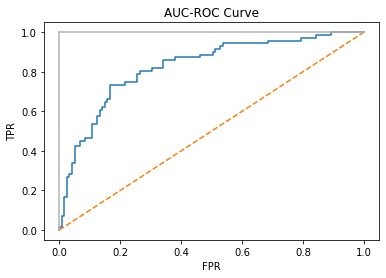

In [433]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [434]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [435]:
# Classification Model 9 ---lightgbm (Light Gradient Boosting Mechanism)
import lightgbm as lgb

#Initiating the model
lgbm = lgb.LGBMClassifier(max_depth=7,n_estimators=100,num_leaves=100,boosting_type='dart',learning_rate=0.05)

#Training the data
diabetes_lgbm_model = lgbm.fit(x_train,y_train)

#Predictions on test data
y_pred = diabetes_lgbm_model.predict(x_test)
y_score = diabetes_lgbm_model.predict_proba(x_test)[:,1]
print("Predictions: \n",y_pred)
print("Predicted Probabilities for diabetes: \n",y_score)

Predictions: 
 [1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1]
Predicted Probabilities for diabetes: 
 [0.70925338 0.30099592 0.51371888 0.06866427 0.21874506 0.05302457
 0.10355582 0.52898484 0.10495372 0.39597173 0.0486     0.19709245
 0.8248774  0.31375206 0.1033305  0.66296024 0.75609165 0.06477603
 0.08906904 0.86934485 0.5224748  0.50620544 0.29766873 0.3384804
 0.10790025 0.64708565 0.12682798 0.38117819 0.51402945 0.8503603
 0.12825682 0.08028097 0.05690168 0.24350058 0.33775291 0.22631289
 0.31325127 0.23160414 0.64986147 0.06354676 0.50080093 0.13976778
 0.24270409 0.10722339 0.54499936 0.16328548 0.47429529 0.11824514
 0.5556382  0.573981

Accuracy:  0.7604166666666666

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       121
           1       0.71      0.59      0.65        71

    accuracy                           0.76       192
   macro avg       0.75      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192

Sensitivity: 
 0.5915492957746479

 Specificity: 
 0.859504132231405

 AUC Score: 
 0.8237690606448609

 Confusion Matrix: 
 [[104  17]
 [ 29  42]]


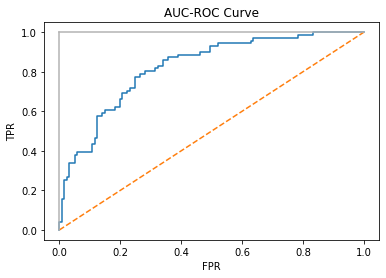

In [436]:
#Model Evaluation
evaluate(y_test,y_pred,y_score)

In [437]:
#Passing metric values into list
results(y_test,y_pred,y_score)

In [438]:
#Summary Table with Metrics
cm = ['Logistic regression','Naive Bayes','KNN','SVM','Decision Tree','Random Forest','XGBoost','XGBoost with RF','Light GBM']
pd.DataFrame({'Classification Model':cm,'Accuracy':acc,'Precision':prec,'Recall':rec,'F1-Score':f1,
              'Sensitivity':sen,'Specificity':spec,'AUC-ROC Score':auc})
# Observations:
# XGBoost with Random Forest Classification models yields highest accuracy of 76.56% and AUC-ROC score of 0.8262 
# Hence, XGBoost with Random Forest is the best Classification Model

,Classification Model,Accuracy,Precision,Recall,F1-Score,Sensitivity,Specificity,AUC-ROC Score
0,Logistic regression,0.734375,0.700000,0.492958,0.578512,0.492958,0.876033,0.818182
1,Naive Bayes,0.729167,0.672727,0.521127,0.587302,0.521127,0.851240,0.785124
2,KNN,0.729167,0.666667,0.535211,0.593750,0.535211,0.842975,0.760447
3,SVM,0.703125,0.675000,0.380282,0.486486,0.380282,0.892562,0.764987
4,Decision Tree,0.729167,0.633803,0.633803,0.633803,0.633803,0.785124,0.709463
5,Random Forest,0.760417,0.735849,0.549296,0.629032,0.549296,0.884298,0.820044
6,XGBoost,0.760417,0.719298,0.577465,0.640625,0.577465,0.867769,0.808637
7,XGBoost with RF,0.765625,0.724138,0.591549,0.651163,0.591549,0.867769,0.826213
8,Light GBM,0.760417,0.711864,0.591549,0.646154,0.591549,0.859504,0.823769
